In [86]:

from PIL import Image
import numpy
 
 
img= Image.open("blacksquare.jpeg")
np_img = numpy.array(img)
 
print(np_img)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


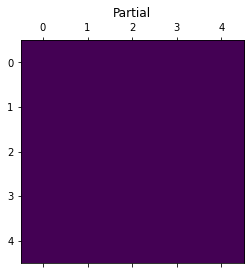

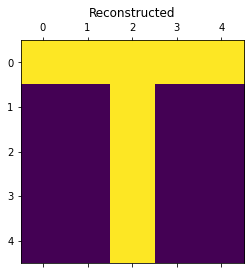

In [178]:
from hopfield import train_neurons, draw, reconstruct

input1 = [
    [1, 1, 1, 1, 1],
    [-1, -1, 1, -1, -1],
    [-1, -1, 1, -1, -1],
    [-1, -1, 1, -1, -1],
    [-1, -1, 1, -1, -1]
]

input2 = [
    [1, -1, -1, -1, 1],
    [1, -1, -1, -1, 1],
    [1, 1, 1, 1, 1],
    [1, -1, -1, -1, 1],
    [1, -1, -1, -1, 1]
]

weights = train_neurons([input1, input2])

partial = [
    [1, 1, 1, -1, 1],
    [-1, -1, -1, -1, -1],
    [-1, 1, -1, 1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]

partial = [
  [-1] * 5 for i in range(5)
]

draw(partial, "Partial")

draw(reconstruct(partial, weights), "Reconstructed")


In [125]:
class Hopfield():
    def __init__(self, sidelength=5):
      self.weights = np.zeros((sidelength**2, sidelength**2))
      self.sidelength = 5
    
    def store_memory(self, memory):
      memory = np.flatten(memory)
      self.weights += np.outer(memory, memory)
  
    
    def recall(self, partial_image):
      
      while(True):
         summed = np.zeros_like(partial_image)
         
         summed += np.reshape(np.matmul(self.weights, np.flatten(partial_image)), (self.sidelength, self.sidelength))
         summed[summed > 0] = 1
         summed[summed <= 0] = -1
         if(np.count_nonzero(summed - partial_image) == 0):
          break
         
         partial_image = np.reshape(summed, (self.sidelength, self.sidelength))



In [126]:
net = Hopfield()

In [135]:
net.store_memory(test)

AttributeError: module 'numpy' has no attribute 'flatten'

In [167]:
a = np.array([[1,2],[3,4]])
a = a.flatten()
a

array([1, 2, 3, 4])

In [128]:
net.weights

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [118]:
test = np.array([
  [1, 1, 1, 1, 1],
  [-1, -1, 1, -1, -1],
  [-1, -1, 1, -1, -1],
  [-1, -1, 1, -1, -1],
  [-1, -1, 1, -1, -1]
])


plt.matshow(test)
plt.show()